In [2]:
from pathlib import Path
import pandas as pd
import plotly.express as px


In [15]:
from pathlib import Path
import pandas as pd

def explore_plant_disease_dataset(root_dir: str):
    """
    Explore le dataset plant_disease avec cette structure :
      root_dir/
          train/
          test/
          dataset/
              train/
              test/
    Compte le nombre de fichiers par espèce et par sous-dossier,
    en indiquant le chemin relatif dans la colonne 'subset'.

    :param root_dir: chemin vers la racine 'dataset'
    :return: DataFrame avec colonnes ['subset', 'species', 'count']
    """
    root = Path(root_dir)
    paths_to_explore = [
        root / 'train',
        root / 'test',
        root / 'dataset' / 'train',
        root / 'dataset' / 'test'
    ]

    records = []

    for path in paths_to_explore:
        if not path.exists():
            print(f"⚠️ Le dossier {path} n'existe pas.")
            continue

        subset = str(path.relative_to(root))  # ex: 'train' ou 'dataset/train'

        for class_dir in path.iterdir():
            if class_dir.is_dir():
                species = class_dir.name.split('___')[0]  # adapte si besoin
                count = sum(1 for f in class_dir.iterdir() if f.is_file())
                records.append({'subset': subset, 'species': species, 'count': count})

    df = pd.DataFrame(records)
    return df

if __name__ == "__main__":
    root_path = '/workspaces/datasciencetest_reco_plante/dataset/plant_disease/data/dataset'
    df = explore_plant_disease_dataset(root_path)
    print(df)

    if not df.empty:
        pivot = df.pivot_table(index='species', columns='subset', values='count', aggfunc='sum', fill_value=0)
        print("\nTableau croisé dynamique (nombre d'images par espèce et subset) :")
        print(pivot)
    else:
        print("Aucun fichier trouvé dans les dossiers spécifiés.")




           subset                  species  count
0           train                   Tomato    299
1           train                    Grape    339
2           train                   Orange   4406
3           train  Cherry_(including_sour)    842
4           train                    Grape    861
..            ...                      ...    ...
147  dataset/test                    Grape    236
148  dataset/test                    Apple     55
149  dataset/test                   Tomato    425
150  dataset/test                    Apple    124
151  dataset/test                    Peach     72

[152 rows x 3 columns]

Tableau croisé dynamique (nombre d'images par espèce et subset) :
subset                   dataset/test  dataset/train  test  train
species                                                          
Apple                             634           2537   634   2537
Blueberry                         300           1202   300   1202
Cherry_(including_sour)           380        

/tmp/ipykernel_26883/958593574.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_counts.index, y=total_counts.values, palette='viridis')


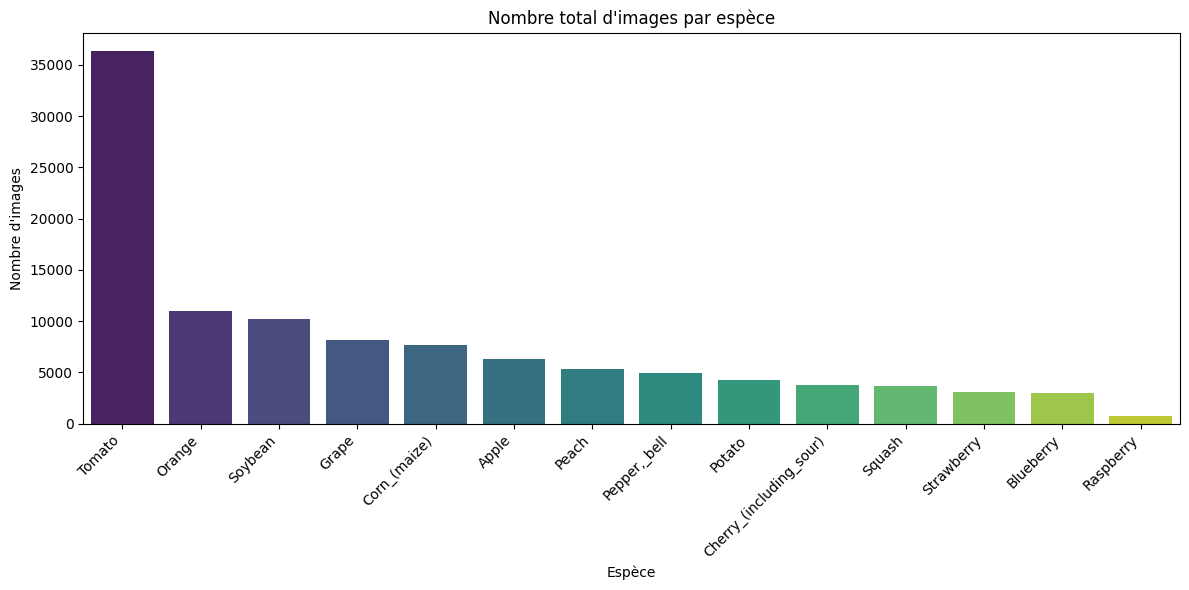

/tmp/ipykernel_26883/958593574.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='species', y='count', hue='subset', ci=None, palette='Set2')


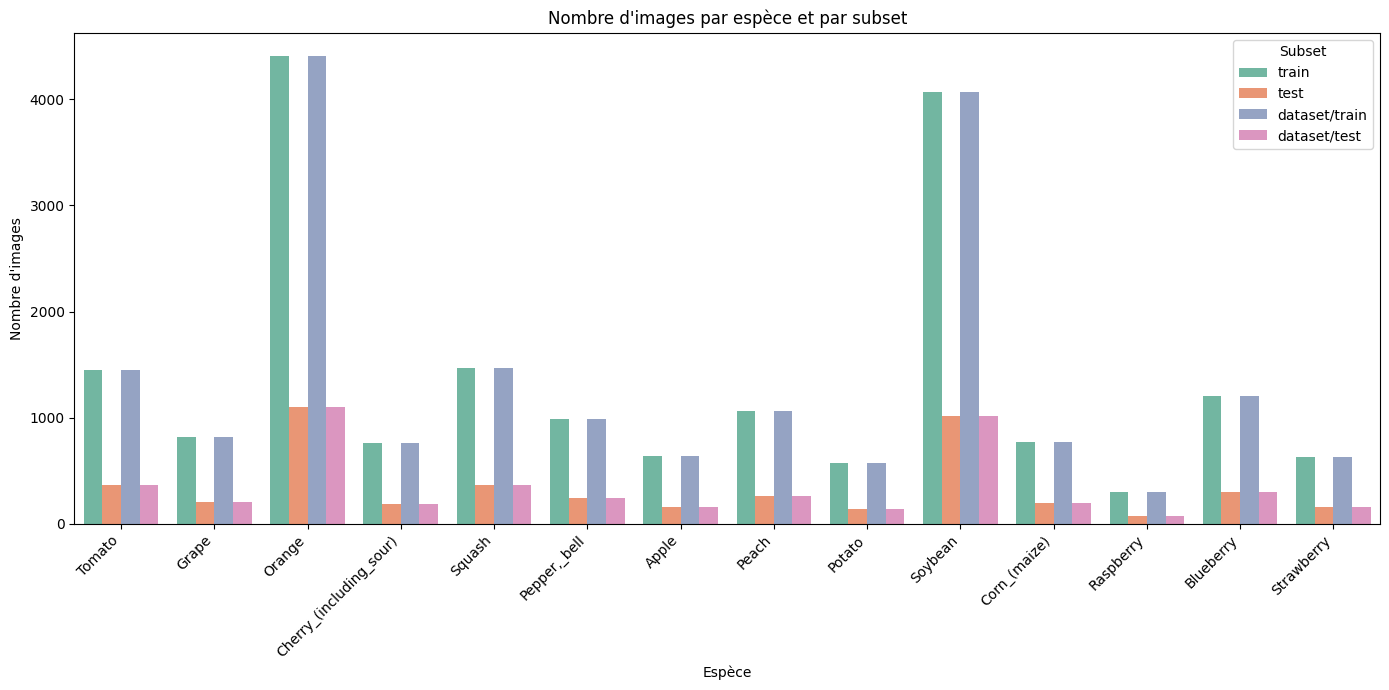

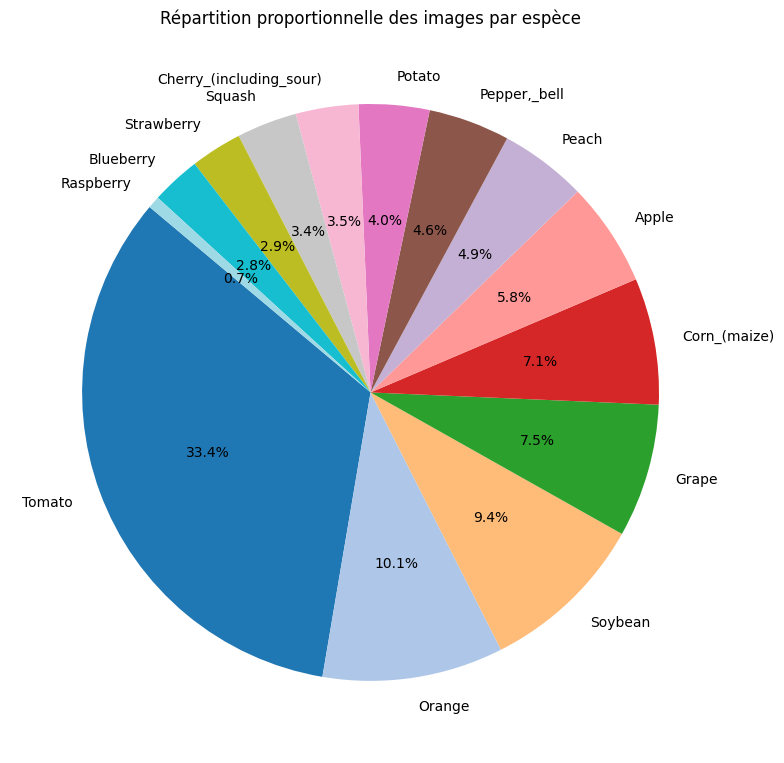

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_plant_disease_data(df):
    """
    Reçoit un DataFrame avec colonnes ['subset', 'species', 'count']
    et génère plusieurs graphiques pour visualiser la répartition.
    """
    # 1. Histogramme total par espèce (somme des counts)
    total_counts = df.groupby('species')['count'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(x=total_counts.index, y=total_counts.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title("Nombre total d'images par espèce")
    plt.ylabel("Nombre d'images")
    plt.xlabel("Espèce")
    plt.tight_layout()
    plt.show()

    # 2. Barplot comparatif par espèce et subset
    plt.figure(figsize=(14,7))
    sns.barplot(data=df, x='species', y='count', hue='subset', ci=None, palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title("Nombre d'images par espèce et par subset")
    plt.ylabel("Nombre d'images")
    plt.xlabel("Espèce")
    plt.legend(title='Subset')
    plt.tight_layout()
    plt.show()

    # 3. Pie chart du poids relatif des espèces (total)
    plt.figure(figsize=(8,8))
    total_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20')
    plt.ylabel('')
    plt.title("Répartition proportionnelle des images par espèce")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    root_path = '/workspaces/datasciencetest_reco_plante/dataset/plant_disease/data/dataset'
    df = explore_plant_disease_dataset(root_path)

    if not df.empty:
        plot_plant_disease_data(df)
    else:
        print("Aucun fichier trouvé dans les dossiers spécifiés.")


Total images analysées : 108610
  subset species                                           filename  width  \
0  train  Tomato  a72414b0-f520-4044-abeb-cd09c28b4a9f___PSU_CG ...    256   
1  train  Tomato  db9e6f9e-2f4f-47dc-a576-287166ae6386___PSU_CG ...    256   
2  train  Tomato  bba77afa-234e-40c9-9d2e-6770ac1789e4___PSU_CG ...    256   
3  train  Tomato  f833998e-f306-4f40-b702-3d4ab8f4ad27___PSU_CG ...    256   
4  train  Tomato  66778ba1-eb89-4597-913a-71c68eb0251e___PSU_CG ...    256   

   height extension  
0     256       jpg  
1     256       jpg  
2     256       jpg  
3     256       jpg  
4     256       jpg  


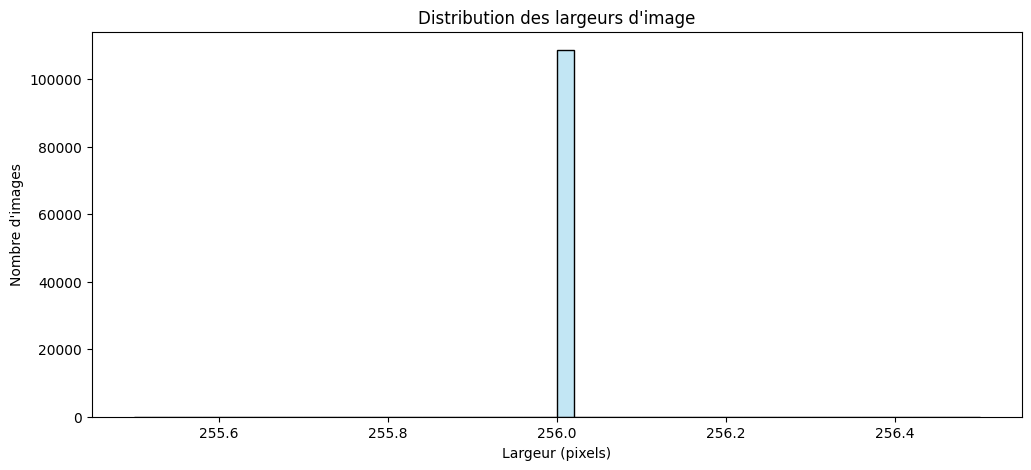

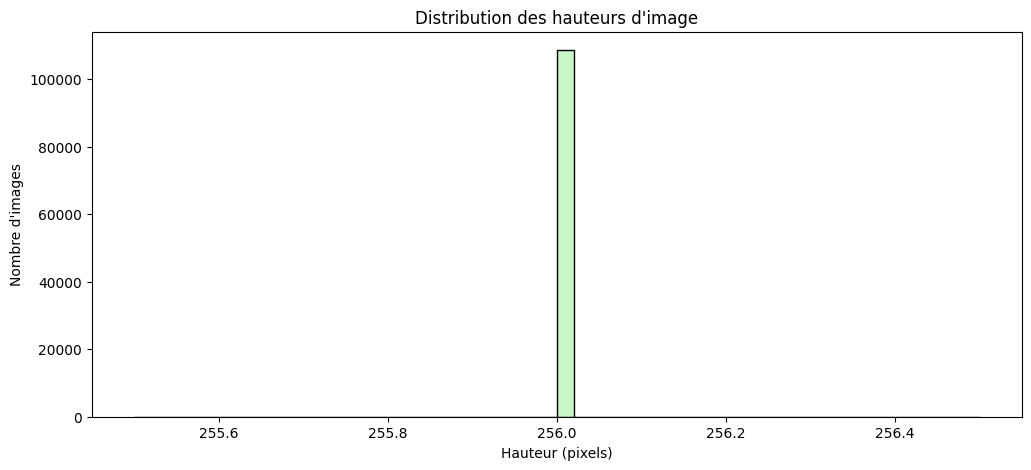

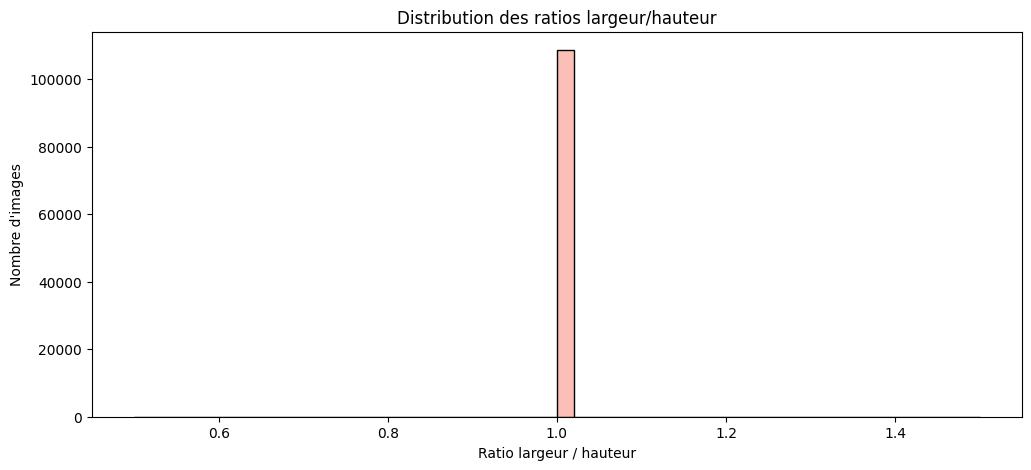

/tmp/ipykernel_26883/2245154215.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ext_counts.index, y=ext_counts.values, palette='pastel')


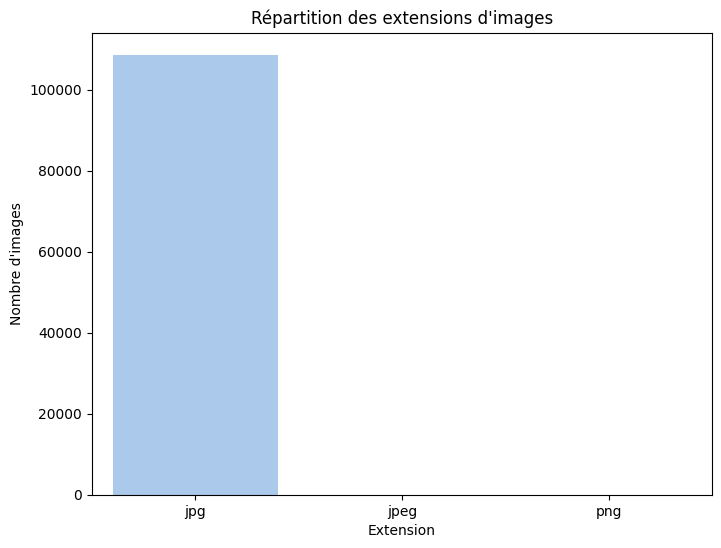

In [22]:
from pathlib import Path
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def collect_image_info(root_dir: str):
    """
    Parcourt tous les fichiers images dans train/test et dataset/train/test,
    collecte taille (width, height) et extension.

    :param root_dir: chemin vers la racine du dataset
    :return: DataFrame avec colonnes ['subset', 'species', 'filename', 'width', 'height', 'extension']
    """
    root = Path(root_dir)
    paths_to_explore = [
        root / 'train',
        root / 'test',
        root / 'dataset' / 'train',
        root / 'dataset' / 'test'
    ]

    records = []

    for path in paths_to_explore:
        if not path.exists():
            print(f"⚠️ Le dossier {path} n'existe pas.")
            continue

        subset = str(path.relative_to(root))  # ex: 'train' ou 'dataset/train'

        for class_dir in path.iterdir():
            if class_dir.is_dir():
                species = class_dir.name.split('___')[0]

                for img_path in class_dir.iterdir():
                    if img_path.is_file():
                        try:
                            with Image.open(img_path) as img:
                                width, height = img.size
                        except Exception as e:
                            print(f"⚠️ Impossible d’ouvrir {img_path}: {e}")
                            width, height = None, None

                        extension = img_path.suffix.lower().strip('.')
                        records.append({
                            'subset': subset,
                            'species': species,
                            'filename': img_path.name,
                            'width': width,
                            'height': height,
                            'extension': extension
                        })

    df = pd.DataFrame(records)
    return df


def plot_image_size_and_extension(df_images):
    """
    Affiche la distribution des tailles d'images et la répartition des extensions.
    """
    # Filtrer les images avec taille connue
    df_sizes = df_images.dropna(subset=['width', 'height']).copy()
    df_sizes['aspect_ratio'] = df_sizes['width'] / df_sizes['height']

    plt.figure(figsize=(12,5))
    sns.histplot(df_sizes['width'], bins=50, kde=True, color='skyblue')
    plt.title("Distribution des largeurs d'image")
    plt.xlabel("Largeur (pixels)")
    plt.ylabel("Nombre d'images")
    plt.show()

    plt.figure(figsize=(12,5))
    sns.histplot(df_sizes['height'], bins=50, kde=True, color='lightgreen')
    plt.title("Distribution des hauteurs d'image")
    plt.xlabel("Hauteur (pixels)")
    plt.ylabel("Nombre d'images")
    plt.show()

    plt.figure(figsize=(12,5))
    sns.histplot(df_sizes['aspect_ratio'], bins=50, kde=True, color='salmon')
    plt.title("Distribution des ratios largeur/hauteur")
    plt.xlabel("Ratio largeur / hauteur")
    plt.ylabel("Nombre d'images")
    plt.show()

    # Extensions
    plt.figure(figsize=(8,6))
    ext_counts = df_images['extension'].value_counts()
    sns.barplot(x=ext_counts.index, y=ext_counts.values, palette='pastel')
    plt.title("Répartition des extensions d'images")
    plt.xlabel("Extension")
    plt.ylabel("Nombre d'images")
    plt.show()


if __name__ == "__main__":
    root_path = '/workspaces/datasciencetest_reco_plante/dataset/plant_disease/data/dataset'
    
    # Collecte des infos sur les images
    df_images = collect_image_info(root_path)
    
    print(f"Total images analysées : {len(df_images)}")
    print(df_images.head())

    # Affichage des distributions taille & extensions
    plot_image_size_and_extension(df_images)




In [25]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from skimage.feature import hog

def extract_features(image_path):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image non chargée : {image_path}")
    img = cv2.resize(img, (128, 128))

    # Moments de Hu
    moments = cv2.moments(img)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)

    # Transformée de Fourier (magnitude moyenne)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-10)
    fourier_mean = magnitude_spectrum.mean()

    # HOG (Histogram of Oriented Gradients)
    hog_features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
    hog_reduced = hog_features[:20]  # on prend juste 20 premiers pour réduire la dimension

    return np.concatenate([hu_moments, [fourier_mean], hog_reduced])

def build_feature_dataset(root_dir: str):
    root = Path(root_dir)
    subsets = [root / 'train', root / 'test', root / 'dataset' / 'train', root / 'dataset' / 'test']
    records = []

    for subset_path in subsets:
        if not subset_path.exists():
            print(f"⚠️ Dossier introuvable: {subset_path}")
            continue
        subset_name = str(subset_path.relative_to(root))

        for species_dir in subset_path.iterdir():
            if species_dir.is_dir():
                species = species_dir.name.split('___')[0]

                for img_path in species_dir.glob('*.*'):  # toutes extensions
                    if img_path.is_file():
                        try:
                            feats = extract_features(img_path)
                            record = {'subset': subset_name, 'species': species, 'image_path': str(img_path)}
                            for i, val in enumerate(feats):
                                record[f'feat_{i}'] = val
                            records.append(record)
                        except Exception as e:
                            print(f"⚠️ Erreur sur {img_path}: {e}")

    df = pd.DataFrame(records)
    return df

if __name__ == "__main__":
    root_path = '/workspaces/datasciencetest_reco_plante/dataset/plant_disease/data/dataset'
    print("➡️ Extraction des features en cours...")
    df_features = build_feature_dataset(root_path)
    print(f"\n✅ Extraction terminée, {len(df_features)} images traitées.")
    print(df_features.head())



➡️ Extraction des features en cours...

✅ Extraction terminée, 108610 images traitées.
  subset species                                         image_path    feat_0  \
0  train  Tomato  /workspaces/datasciencetest_reco_plante/datase...  2.779556   
1  train  Tomato  /workspaces/datasciencetest_reco_plante/datase...  2.884542   
2  train  Tomato  /workspaces/datasciencetest_reco_plante/datase...  2.844062   
3  train  Tomato  /workspaces/datasciencetest_reco_plante/datase...  2.843248   
4  train  Tomato  /workspaces/datasciencetest_reco_plante/datase...  2.792060   

     feat_1    feat_2    feat_3  feat_4     feat_5  feat_6  ...   feat_18  \
0  8.925647  9.950841  9.935539   -10.0  -9.999998   -10.0  ...  0.313013   
1  8.656526  9.995537  9.969321    10.0  -9.999999    10.0  ...  0.137871   
2  9.567776  9.984908  9.984089   -10.0 -10.000000    10.0  ...  0.110964   
3  8.904616  9.967619  9.921277    10.0  -9.999997    10.0  ...  0.157417   
4  8.678897  9.945164  9.870153   -10.0  

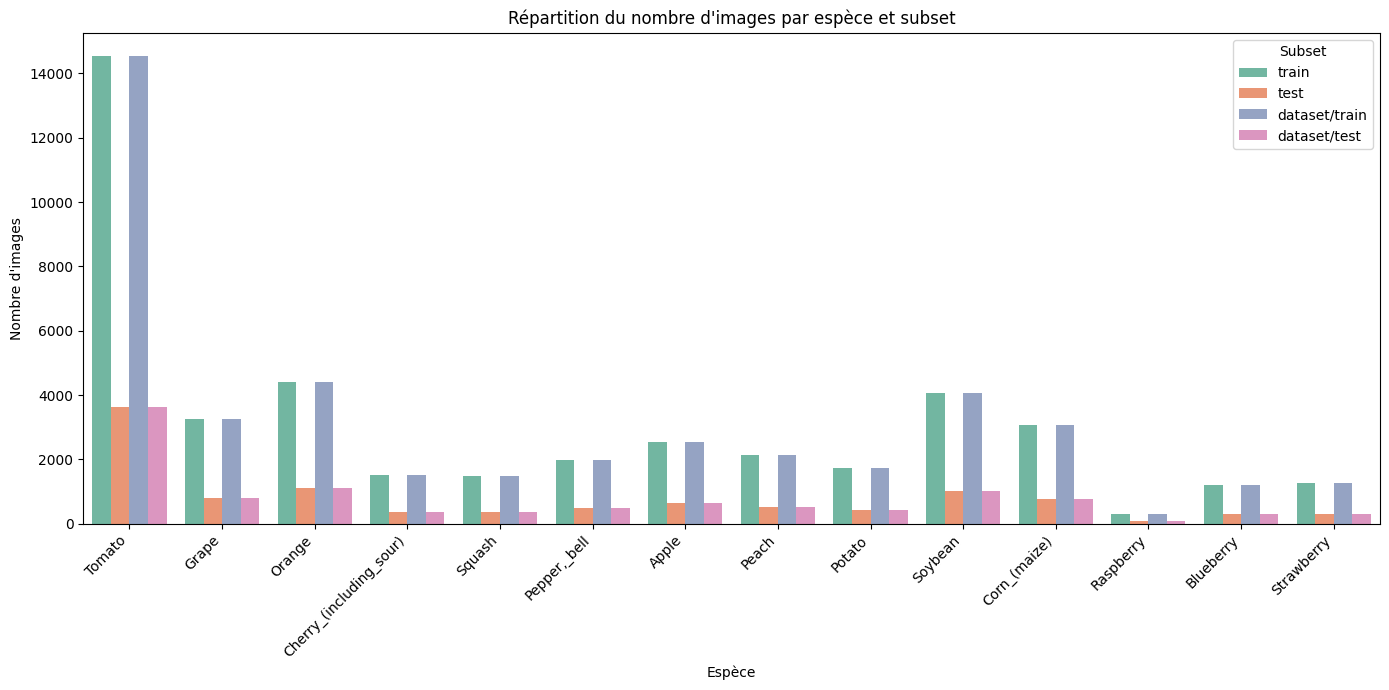

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(df_features):
    plt.figure(figsize=(14, 7))
    sns.countplot(data=df_features, x='species', hue='subset', palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title("Répartition du nombre d'images par espèce et subset")
    plt.xlabel("Espèce")
    plt.ylabel("Nombre d'images")
    plt.legend(title='Subset')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Assure-toi d'avoir df_features chargé (issu de l'extraction)
    plot_class_distribution(df_features)
